In [2]:
#191180030-Eylül Dalkıran

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data=pd.read_csv('data.csv')

titanic_df=data.copy()

# Question 1:

In [46]:
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Question 2:

In [47]:
for col in titanic_df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


# Question 3:
There are 891 rows in this dataset, so there are 891 passengers on the train.

In [48]:
len(titanic_df.index)

891

# Question 4:

In [49]:
NaNAge=titanic_df['Age'].isnull().sum()
NaNCabin=titanic_df['Cabin'].isnull().sum()
NaNEmbarked=titanic_df['Embarked'].isnull().sum()
print("Age Missing Values:",NaNAge)
print("Cabin Missing Values:",NaNCabin)
print("Embarked Missing Values:",NaNEmbarked)

Age Missing Values: 177
Cabin Missing Values: 687
Embarked Missing Values: 2


Delete NaN values:

In [3]:
titanic_df1=titanic_df.dropna()

In [51]:
titanic_df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Question 5:

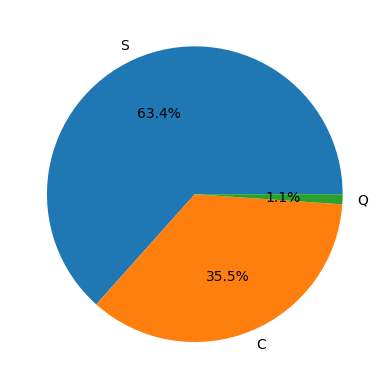

In [52]:
labels = [x for x in titanic_df1.Embarked.value_counts().index]
values = titanic_df1.Embarked.value_counts()
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.show()

Looking at the pie chart, we can say that the most passengers are from Southampton and the least passengers from Queenstown.

# Question 6:

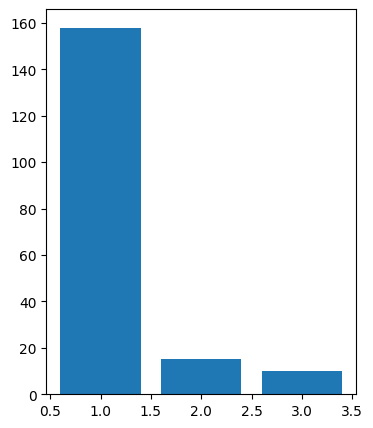

In [53]:

x_label = [x for x in titanic_df1.Pclass.value_counts().index]
y_label = titanic_df1.Pclass.value_counts()
barWidth = 0.50
fig = plt.subplots(figsize =(4,5))
plt.bar(x_label, y_label)
plt.show()


By looking at the bar chart, we can say that the most passengers are in the 1st class.

# Question 7:

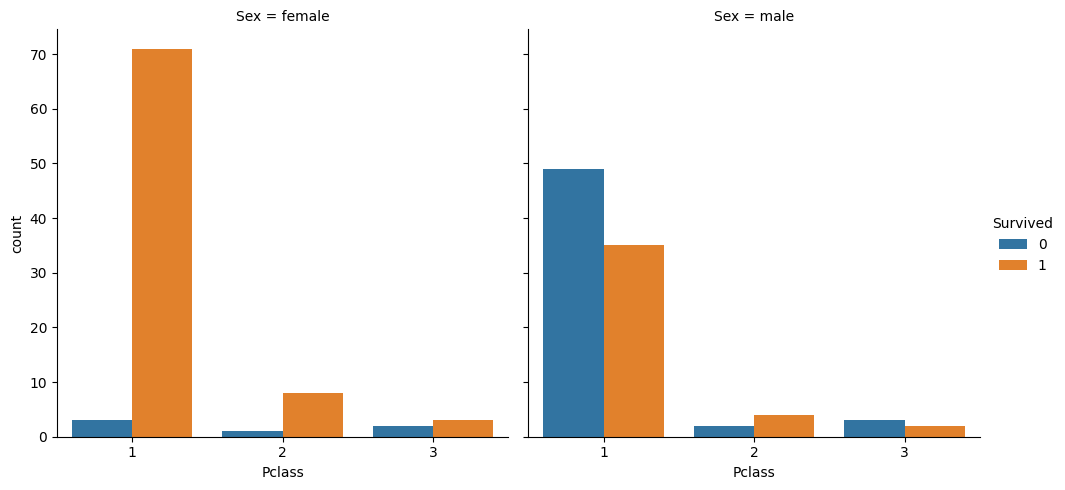

In [15]:
sns.catplot(x ='Pclass', hue ='Survived',
kind ='count', col ='Sex', data = titanic_df1)

# Question 8:


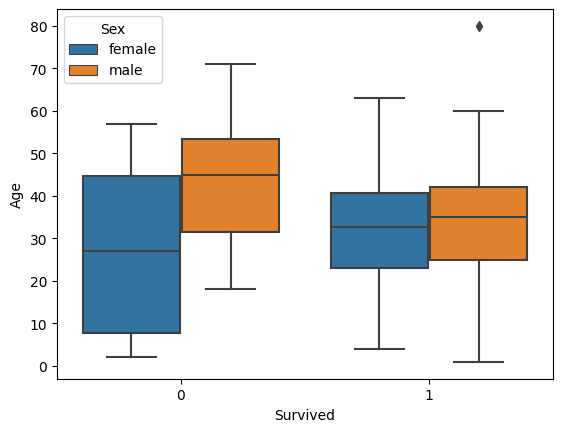

In [56]:
sns.boxplot(x="Survived", y="Age", hue="Sex", data=titanic_df1);

# Question 9:

In [58]:
pd.crosstab(titanic_df1.Sex, titanic_df1.Survived)

Survived,0,1
Sex,,
female,6,82
male,54,41


# Question 10:

By looking at the cross table, we can say that the survival rate of women is higher than men.

# Question 11, Question 12:

The correlation coefficient between survival and ticket class is -0.035. So these have a moderate correlation with each other.



C:\Users\Eylül Dalkıran\AppData\Local\Temp\ipykernel_13632\2787758718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['Sex_Numeric'] = (titanic_df1['Sex'].astype('category')).cat.codes#digitizing gender values


Text(0.5, 1.0, 'annot=False')

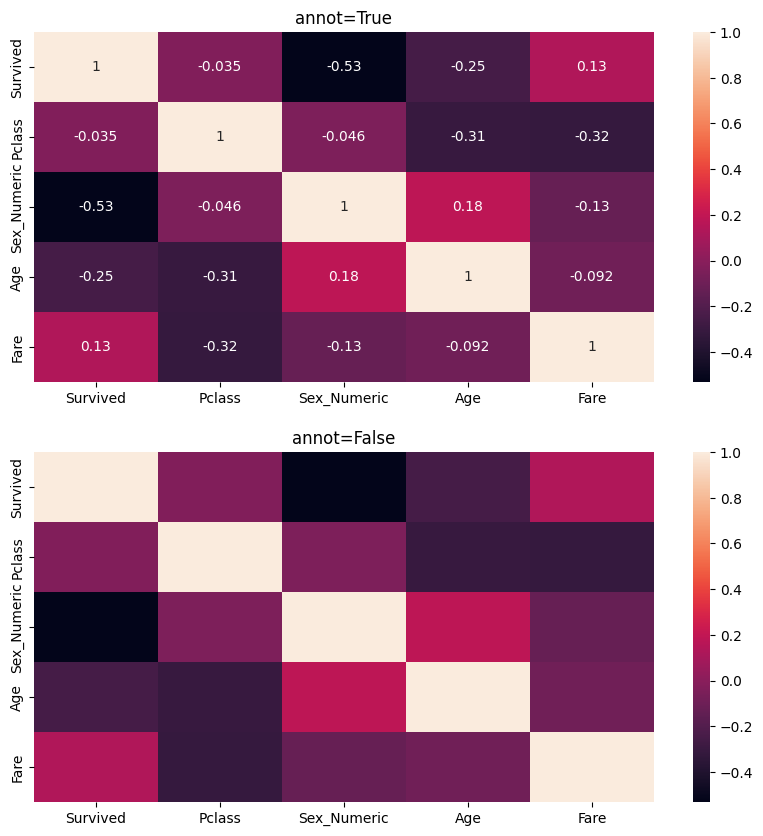

In [16]:
titanic_df1['Sex_Numeric'] = (titanic_df1['Sex'].astype('category')).cat.codes#digitizing gender values

cols = ["Survived","Pclass","Sex_Numeric","Age","Fare"]

titanic_df2=titanic_df1[cols].corr()

fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))

sns.heatmap(titanic_df2,annot=True,ax=ax1)
sns.heatmap(titanic_df2,annot=False,ax=ax2)

ax1.set_title('annot=True')
ax2.set_title('annot=False')

# Question 13:

In [62]:
titanic_df["Age"].min()

0.42

# Question 14:

In [63]:
titanic_df["Fare"].mean()

32.204207968574636

# Question 15:

In [32]:
survived= titanic_df1[titanic_df1['Survived'] == 1]


In [38]:
survived_age_max=survived["Age"].max()
survived_oldest=survived[survived['Age']==survived_age_max]
survived_oldest["Name"]

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

# Question 16:

In [39]:
survived['Sex_Numeric'] = (survived['Sex'].astype('category')).cat.codes
survived_female=survived[survived['Sex_Numeric']==0]
survived_female_age_max=survived_female["Age"].max()
survived_oldest_female=survived_female[survived_female['Age']==survived_female_age_max]
survived_oldest_female["Name"]


C:\Users\Eylül Dalkıran\AppData\Local\Temp\ipykernel_20508\1742249651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['Sex_Numeric'] = (survived['Sex'].astype('category')).cat.codes


275    Andrews, Miss. Kornelia Theodosia
Name: Name, dtype: object

# Question 17:

In [38]:
withoutparents=titanic_df1[titanic_df1['Parch']==0]
withoutparents["Age"].min()

16.0

There are any children under 10 years old travelling without parents.

# Question 18:

<AxesSubplot: xlabel='Age', ylabel='Count'>

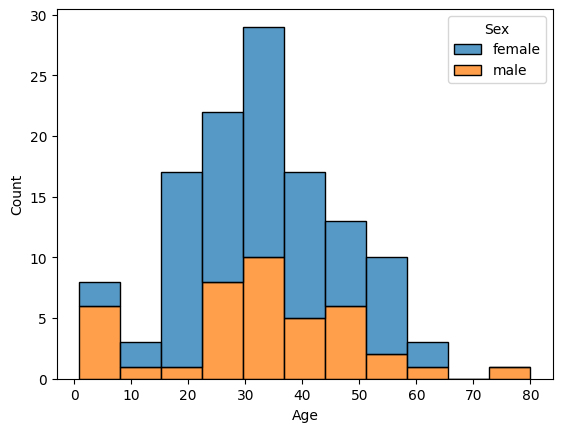

In [42]:
sns.histplot(data=titanic_df1, x=survived["Age"],  hue=survived["Sex"], multiple="stack")

#By looking at this histogram, we understand that female passengers have a higher chance of survival than males.

# Question 19:

In [44]:
titanic_df1["SibSp"].max()

3

The passenger with the highest number of siblings has two siblings.

# Question 20:

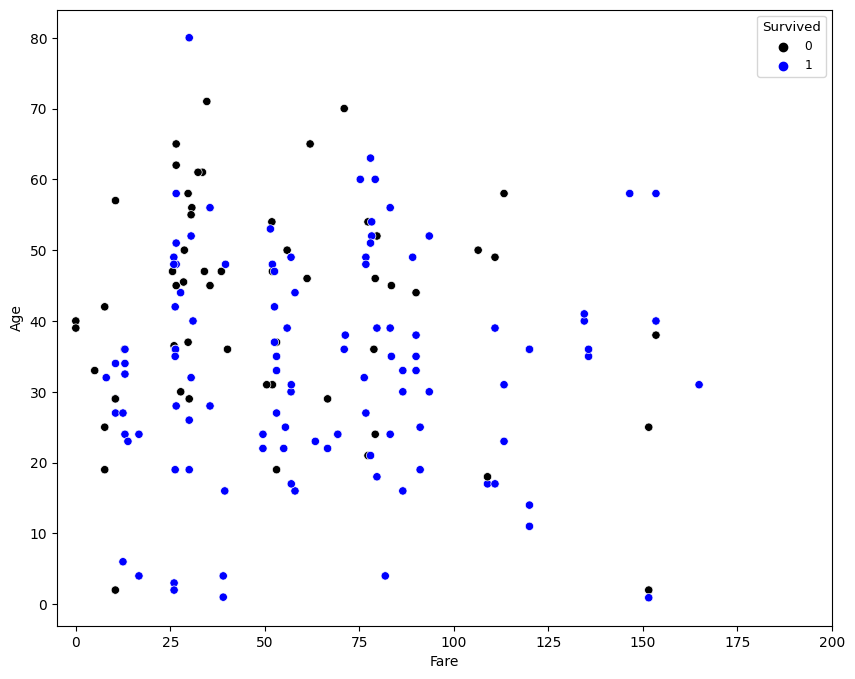

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
plt.xlim(-5,200)

with sns.plotting_context('notebook',font_scale=0.8):

    ax = sns.scatterplot(
        x='Fare',
        y='Age',
        hue='Survived',
        palette=['black','blue'],
        data=titanic_df1,
        ax=ax
    )
